In [165]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
df=pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [167]:
datax=df["Year"].values
datay=df["Value"].values

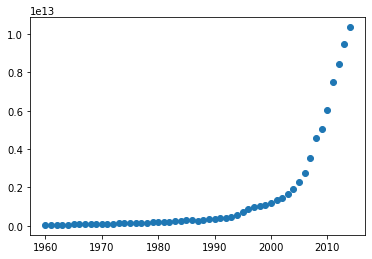

In [168]:
plt.scatter(datax,datay)

In [169]:
#making model
def sigmoid(x,beta_1,beta_2):
    y=1/(1+np.exp(-beta_1*(x-beta_2)))
    return y

In [170]:
#normalizing the data
datax_norm=datax/max(datax)
datay_norm=datay/max(datay)

print(min(datay))

46685178504.3274


In [171]:
#making a curve fit
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,datax_norm,datay_norm)

print("beta1:%f  beta2:%f"%(popt[0],popt[1]))

beta1:690.451711  beta2:0.997207


0.8749738567855547


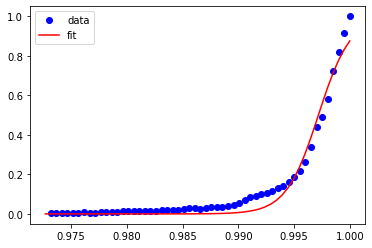

In [176]:
x=np.linspace(1960,2015,55)
x=x/max(x) #normalizing is necessary

#Modeling Line
y=sigmoid(x,*popt) # x is the points on x axis
print(y.max())
plt.plot(datax_norm,datay_norm,"bo")
plt.plot(x,y,"-r")

plt.legend(["data","fit"],loc="best")

plt.show()

In [173]:
#input normalizer
def new(val):
    x=val/2015
    return x     

In [174]:
#prediction
y=sigmoid(new(1990),*popt)

In [175]:
#Error specification
msk=np.random.rand(len(df))<0.8

trainx=datax_norm[msk]
trainy=datay_norm[msk]

testx=datax_norm[~msk]
testy=datay_norm[~msk]

#using curvefit
popt,pcov=curve_fit(sigmoid,trainx,trainy) #training using the training set

test_hat=sigmoid(testx,*popt) # predicting/testing using the testing se

print("Mean Absolute Error:%f "%np.mean(np.absolute(test_hat-testy)))
print("Residual Sum Of Squares (MSE):%f"%np.mean((test_hat-testy)**2))

from sklearn.metrics import*
print("Model Accuracy:%f"%(r2_score(test_hat,testy)*100))

Mean Absolute Error:0.017028 
Residual Sum Of Squares (MSE):0.000423
Model Accuracy:97.688817
